In [27]:
## We import the necessary libraries
import numpy as np
import csv


In [28]:
## Loading the data

# Specify the file path
file_path = 'Data/2015.csv'
doc = []
# Open the CSV file
with open(file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    
    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Each row is a list representing the columns in that row
        doc.append(row)

# Add a column to doc that contains categories for each country based on their happiness score
# The categories should be based on the following happiness scores:
# 0-3: "Low"
# 4-5: "Medium"
# 6-10: "High"
categories = []
for row in doc[1:]:
    score = float(row[3])
    if score <= 3.5:
        categories.append('Low')
    elif score <= 5.5:
        categories.append('Medium')
    else:
        categories.append('High')
# Add the categories list as a new column in doc
doc[0].append('Categories')
for i, category in enumerate(categories):
    doc[i + 1].append(category)

doc



[['Country',
  'Region',
  'Happiness Rank',
  'Happiness Score',
  'Standard Error',
  'Economy (GDP per Capita)',
  'Family',
  'Health (Life Expectancy)',
  'Freedom',
  'Trust (Government Corruption)',
  'Generosity',
  'Dystopia Residual',
  'Categories'],
 ['Switzerland',
  'Western Europe',
  '1',
  '7.587',
  '0.03411',
  '1.39651',
  '1.34951',
  '0.94143',
  '0.66557',
  '0.41978',
  '0.29678',
  '2.51738',
  'High'],
 ['Iceland',
  'Western Europe',
  '2',
  '7.561',
  '0.04884',
  '1.30232',
  '1.40223',
  '0.94784',
  '0.62877',
  '0.14145',
  '0.4363',
  '2.70201',
  'High'],
 ['Denmark',
  'Western Europe',
  '3',
  '7.527',
  '0.03328',
  '1.32548',
  '1.36058',
  '0.87464',
  '0.64938',
  '0.48357',
  '0.34139',
  '2.49204',
  'High'],
 ['Norway',
  'Western Europe',
  '4',
  '7.522',
  '0.0388',
  '1.459',
  '1.33095',
  '0.88521',
  '0.66973',
  '0.36503',
  '0.34699',
  '2.46531',
  'High'],
 ['Canada',
  'North America',
  '5',
  '7.427',
  '0.03553',
  '1.32629',


In [29]:
## Preparing the data for the PCA

# Extract attribute names (1st row, column 6 until 12)
attributeNames = doc[0][5:11]

# Extract class names to python list,
# then encode with integers (dict)
classLabels = [row[12] for row in doc[1:]]  # The class labels are in the first column
classNames = list(set(classLabels))
classNames = sorted(classNames, key=str.lower) # Sort the class names
classDict = dict(zip(classNames,range(len(classNames))))

print(classDict)

# Extract vector y containing the name labels and class names of classDict, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((len(doc[1:]), len(doc[0][5:11])))

# Extract data to X
for i, row in enumerate(doc[1:]):
    X[i, :] = [float(num) for num in row[5:11]]


# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(N, M, C)
print(len(X), len(X[0]))








{'High': 0, 'Low': 1, 'Medium': 2}
158 6 3
158 6


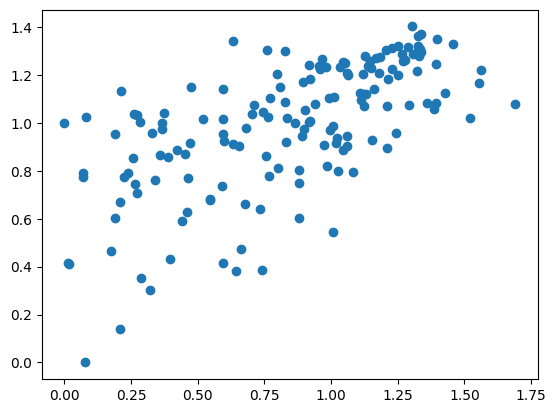

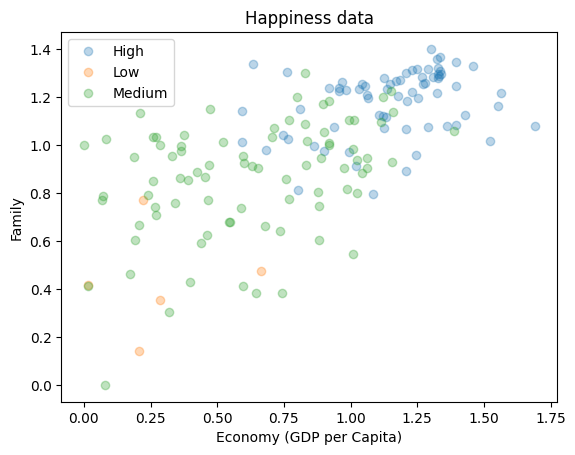

In [30]:

from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel

# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) #Try to uncomment this line
plot(X[:, i], X[:, j], "o")

# %%
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.
f = figure()
title("Happiness data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.3)

legend(classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()









Are there issues with outliers in the data,
do the attributes appear to be normal distributed,
are variables correlated,
does the primary machine learning modeling aim appear to be feasible
based on your visualizations

The attributes have the same scales (they already have a mean = 1 and standard dev =...). Therefore, we don't need to include a step where the
data is standardizes by the standard deviation prior to the PCA analysis

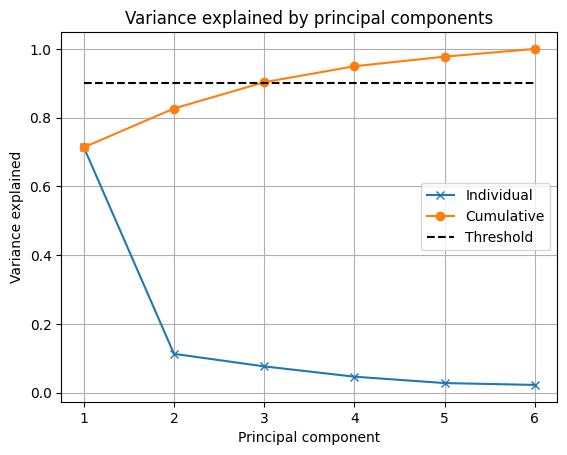

In [31]:
## Plotting the amount of variation explained as a function of the number of PCA components included

import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


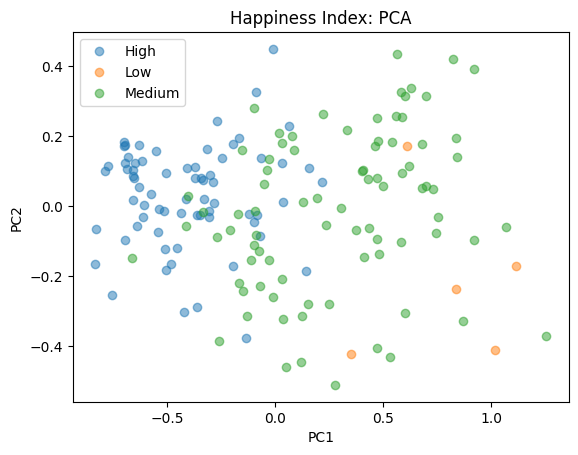

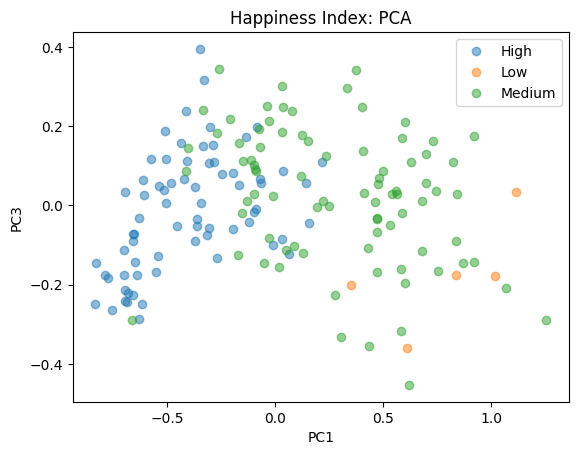

In [32]:
## Plotting the data projected onto the considered principal components

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Happiness Index: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))

# Output result to screen
show()


# Indices of the principal components to be plotted
i = 0
j = 2

# Plot PCA of the data
f = figure()
title("Happiness Index: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))

# Output result to screen
show()







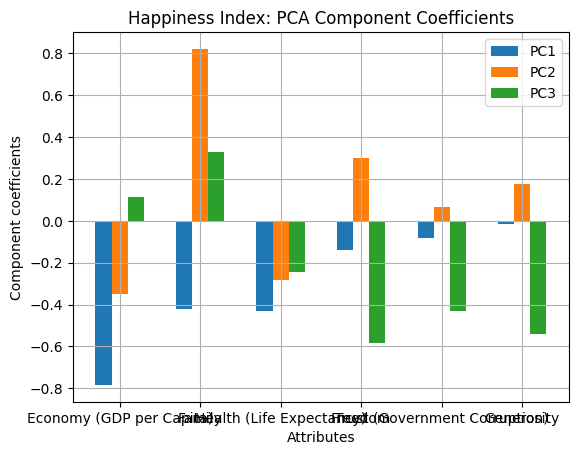

In [34]:

## Plotting the principal directions of the considered PCA components (either find a way to plot them or interpret them in terms of the features)

import matplotlib.pyplot as plt
from scipy.linalg import svd

Y = X - np.ones((N, 1)) * X.mean(0)
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Happiness Index: PCA Component Coefficients")
plt.show()




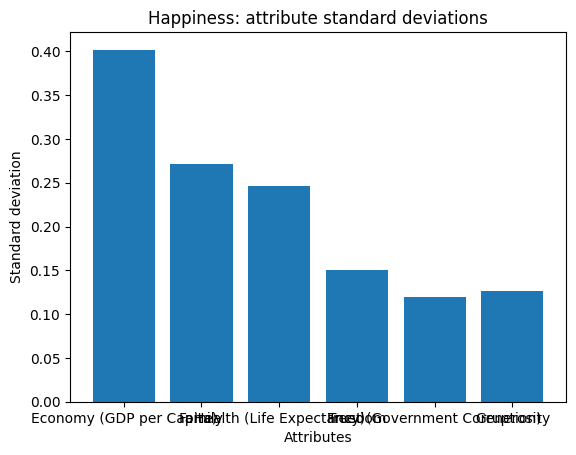

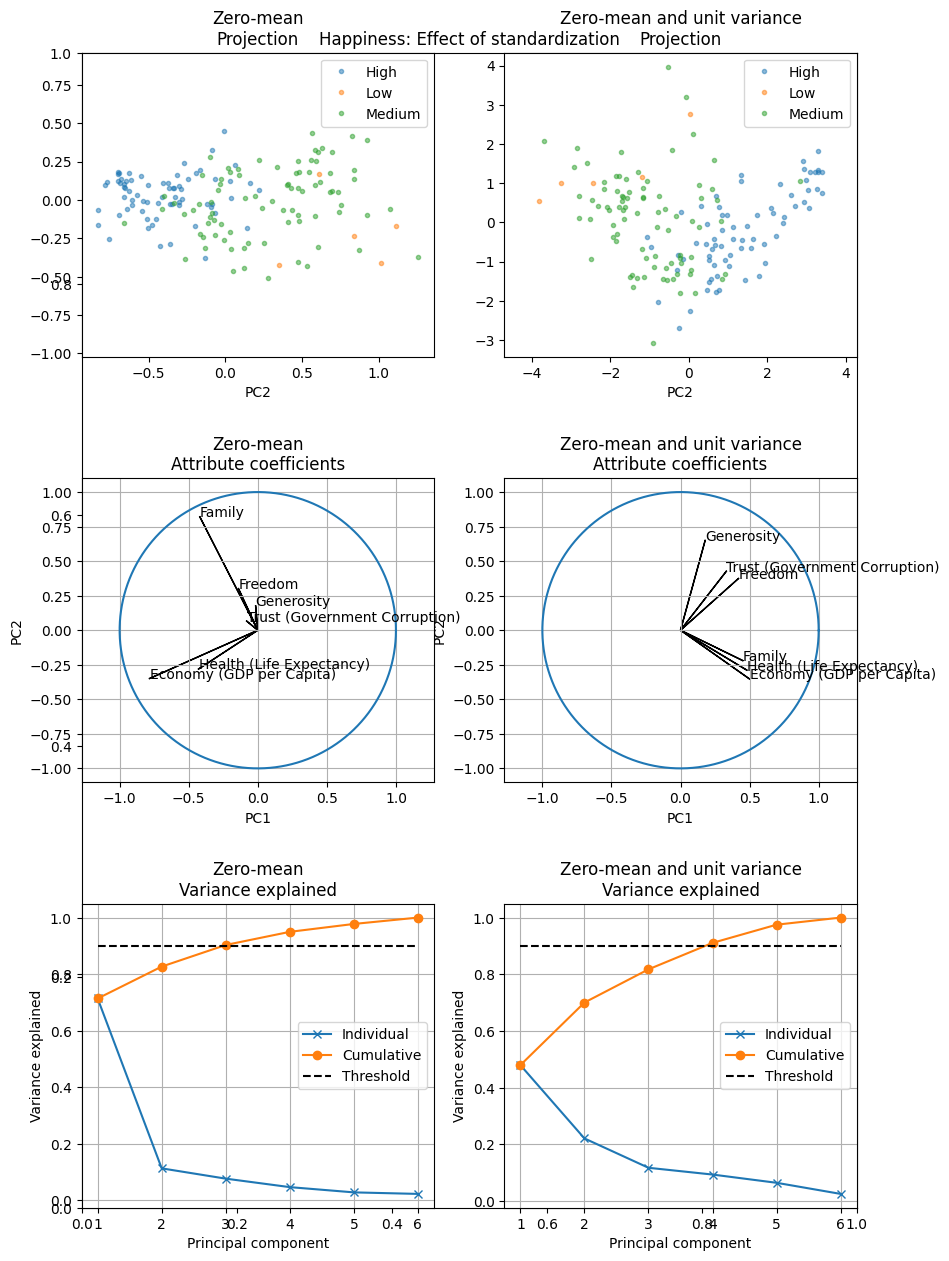

In [35]:


# Try this *later* (for last), and explain the effect
X_s = X.copy() # Make a to be "scaled" version of X
X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("Happiness: attribute standard deviations")

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
# X_s = X.copy() # Make a to be "scaled" version of X
# X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?
## => it affect 


# Subtract the mean from the data
Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("Happiness: Effect of standardization")
nrows = 3
ncols = 2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T  # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k == 1:
        V = -V
        U = -U

    # Compute variance explained
    rho = (S * S) / (S * S).sum()

    # Compute the projection onto the principal components
    Z = U * S

    # Plot projection
    plt.subplot(nrows, ncols, 1 + k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y == c, i], Z[y == c, j], ".", alpha=0.5)
    plt.xlabel("PC" + str(i + 1))
    plt.xlabel("PC" + str(j + 1))
    plt.title(titles[k] + "\n" + "Projection")
    plt.legend(classNames)
    plt.axis("equal")

    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, i], V[att, j])
        plt.text(V[att, i], V[att, j], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.grid()
    # Add a unit circle
    plt.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    plt.title(titles[k] + "\n" + "Attribute coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title("Variance explained by principal components")
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()
    plt.title(titles[k] + "\n" + "Variance explained")

plt.show()
